In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataframe= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/국립국어원/evaluated_ner_drop_base.tsv', delimiter='\t')
dataframe= dataframe.drop(['Unnamed: 0'], axis=1)
dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",Question NER,Text NER,prediction
0,1,"['구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다.', ' 김봉제는 관약...",봉룡은 숙정을 죽였는가?,0,봉룡,아내 막냇동생 형제 형 김봉룡 간창골 안뒤산 김봉제 통영 구한말,0
1,2,['빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온...,세르비아 사람들은 빵을 즐겨 먹는다.,1,빵 세르비아,빵 통밀 빵 호밀 밀 건강식 오븐 근대 600g 세르비아,1
2,3,"['PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,PLC,"아일랜드 공화국 연방 PLC 50,000파운드 회사법 영국 미국",0
3,4,"['가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다.', '5cm...",가리비는 적을 만나면 껍데기를 닫는다.,0,가리비,붉은색 몸 가리비 노란색 주황색 2~2.5cm 불가사리 보라색,0
4,5,"['두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라...",두아 리파는 영국인인가?,1,리파 영국인,BBC 9위 1995년 8월 22일 ~ 잉글랜드 싱어송라이터 2016 리파 영국,0


In [ ]:
dataframe['text length']= dataframe.apply(lambda x: len(x['Text']), axis=1)

dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",prediction,text length
0,1,"구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다. 김봉제는 관약국을 경영하...",봉룡은 숙정을 죽였는가?,0,0,156
1,2,빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온다....,세르비아 사람들은 빵을 즐겨 먹는다.,1,1,255
2,3,"PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 ...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,0,201
3,4,가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다. 패각의 길이는 ...,가리비는 적을 만나면 껍데기를 닫는다.,0,1,229
4,5,"두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라이터...",두아 리파는 영국인인가?,1,1,130


(array([  7.,  85., 182., 210., 111.,  59.,  30.,  12.,   1.,   3.]),
 array([ 32. ,  76.6, 121.2, 165.8, 210.4, 255. , 299.6, 344.2, 388.8,
        433.4, 478. ]),
 <a list of 10 Patch objects>)

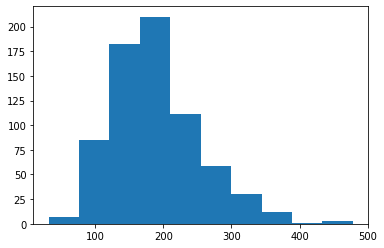

In [ ]:
plt.hist(dataframe['text length'])

In [ ]:
dataframe['score']= dataframe.apply(lambda x: 1 if (x['Answer(FALSE = 0, TRUE = 1)']== x['prediction']) else 0, axis=1)
dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",prediction,text length,score
0,1,"구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다. 김봉제는 관약국을 경영하...",봉룡은 숙정을 죽였는가?,0,0,156,1
1,2,빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온다....,세르비아 사람들은 빵을 즐겨 먹는다.,1,1,255,1
2,3,"PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 ...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,0,201,1
3,4,가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다. 패각의 길이는 ...,가리비는 적을 만나면 껍데기를 닫는다.,0,1,229,0
4,5,"두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라이터...",두아 리파는 영국인인가?,1,1,130,1


(array([ 92., 182., 210., 113.,  57.,  46.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

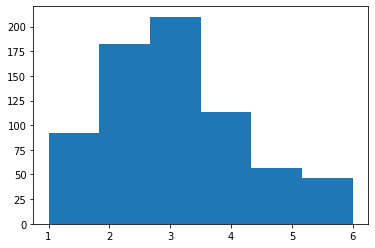

In [ ]:
bin=[ 32. ,  76.6, 121.2, 165.8, 210.4, 255. , 299.6, 344.2, 388.8, 433.4, 478. ]

dataframe.loc[dataframe['text length']<=bin[1], 'category']=1
dataframe.loc[(dataframe['text length']<=bin[2])&(dataframe['text length']>bin[1]), 'category']=1
dataframe.loc[(dataframe['text length']<=bin[3])&(dataframe['text length']>bin[2]), 'category']=2
dataframe.loc[(dataframe['text length']<=bin[4])&(dataframe['text length']>bin[3]), 'category']=3
dataframe.loc[(dataframe['text length']<=bin[5])&(dataframe['text length']>bin[4]), 'category']=4
dataframe.loc[(dataframe['text length']<=bin[6])&(dataframe['text length']>bin[5]), 'category']=5
dataframe.loc[(dataframe['text length']<=bin[7])&(dataframe['text length']>bin[6]), 'category']=6
dataframe.loc[(dataframe['text length']<=bin[8])&(dataframe['text length']>bin[7]), 'category']=6
dataframe.loc[(dataframe['text length']<=bin[9])&(dataframe['text length']>bin[8]), 'category']=6
dataframe.loc[dataframe['text length']>bin[9], 'category']=6

dataframe.head()
plt.hist(dataframe['category'], bins= 6)

In [ ]:
dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",prediction,text length,score,category
0,1,"구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다. 김봉제는 관약국을 경영하...",봉룡은 숙정을 죽였는가?,0,0,156,1,2.0
1,2,빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온다....,세르비아 사람들은 빵을 즐겨 먹는다.,1,1,255,1,4.0
2,3,"PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 ...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,0,201,1,3.0
3,4,가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다. 패각의 길이는 ...,가리비는 적을 만나면 껍데기를 닫는다.,0,1,229,0,4.0
4,5,"두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라이터...",두아 리파는 영국인인가?,1,1,130,1,2.0


In [ ]:
count= [0 for _ in range(len(bin))]

for index in range(len(dataframe['score'])):

  if int(dataframe['score'][index])==1:
    count[int(dataframe['category'][index])]+=1
    
print(count)
print(sum(count))

[0, 56, 100, 112, 67, 25, 28, 0, 0, 0, 0]
388


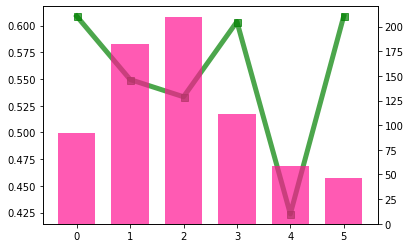

In [ ]:
x = np.arange(0, 6)
count = np.array([ 92., 182., 210., 111.,  59., 46.])
score = np.array([ 56, 100, 112, 67, 25, 28])
answer=score/count

fig, ax1 = plt.subplots()

ax1.plot(x, answer, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='count')
ax2 = ax1.twinx()
ax2.bar(x, count, color='deeppink', label='count', alpha=0.7, width=0.7)

plt.show()

In [ ]:
~76.6, 121.2, 165.8, 210.4, 255. , 299.6, 344.2, 388.8~

SyntaxError: ignored

In [ ]:
dataframe['Text'][2]

'PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 공화국 산하 공기업이다. 이 회사는 주식을 자유롭게 매각하고 일반에 거래할 수 있는 유한 책임 회사이며, 최소 주식 자본금은 50,000파운드이고 보통 이름 뒤에 PLC를 쓴다. 미국의 비슷한 회사들을 공개 상장회사라고 부른다. 공개 유한회사도 별도의 법적 정체성을 갖게 된다.'

In [ ]:
#문장 수 별

dataframe['text count']= dataframe.apply(lambda x: x['Text'].count('.'), axis=1)

dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",Question NER,Text NER,prediction,text count
0,1,"['구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다.', ' 김봉제는 관약...",봉룡은 숙정을 죽였는가?,0,봉룡,아내 막냇동생 형제 형 김봉룡 간창골 안뒤산 김봉제 통영 구한말,0,3
1,2,['빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온...,세르비아 사람들은 빵을 즐겨 먹는다.,1,빵 세르비아,빵 통밀 빵 호밀 밀 건강식 오븐 근대 600g 세르비아,1,6
2,3,"['PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,PLC,"아일랜드 공화국 연방 PLC 50,000파운드 회사법 영국 미국",0,3
3,4,"['가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다.', '5cm...",가리비는 적을 만나면 껍데기를 닫는다.,0,가리비,붉은색 몸 가리비 노란색 주황색 2~2.5cm 불가사리 보라색,0,3
4,5,"['두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라...",두아 리파는 영국인인가?,1,리파 영국인,BBC 9위 1995년 8월 22일 ~ 잉글랜드 싱어송라이터 2016 리파 영국,0,3


(array([  2.,  47., 234., 302.,  86.,  14.,  10.,   3.,   1.,   1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

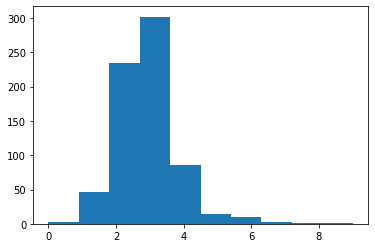

In [ ]:
plt.hist(dataframe['text count'])

In [ ]:
dataframe['score']= dataframe.apply(lambda x: 1 if (x['Answer(FALSE = 0, TRUE = 1)']== x['prediction']) else 0, axis=1)
dataframe.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",Question NER,Text NER,prediction,text count,score
0,1,"['구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다.', ' 김봉제는 관약...",봉룡은 숙정을 죽였는가?,0,봉룡,아내 막냇동생 형제 형 김봉룡 간창골 안뒤산 김봉제 통영 구한말,0,3,1
1,2,['빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온...,세르비아 사람들은 빵을 즐겨 먹는다.,1,빵 세르비아,빵 통밀 빵 호밀 밀 건강식 오븐 근대 600g 세르비아,1,6,1
2,3,"['PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,PLC,"아일랜드 공화국 연방 PLC 50,000파운드 회사법 영국 미국",0,3,1
3,4,"['가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다.', '5cm...",가리비는 적을 만나면 껍데기를 닫는다.,0,가리비,붉은색 몸 가리비 노란색 주황색 2~2.5cm 불가사리 보라색,0,3,1
4,5,"['두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라...",두아 리파는 영국인인가?,1,리파 영국인,BBC 9위 1995년 8월 22일 ~ 잉글랜드 싱어송라이터 2016 리파 영국,0,3,0


(array([ 49., 234., 302.,  86.,  14.,  15.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

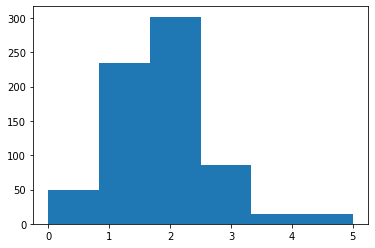

In [ ]:
bin=[ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]

dataframe.loc[dataframe['text count']<=bin[1], 'category']=0
dataframe.loc[(dataframe['text count']<=bin[2])&(dataframe['text count']>bin[1]), 'category']=1
dataframe.loc[(dataframe['text count']<=bin[3])&(dataframe['text count']>bin[2]), 'category']=2
dataframe.loc[(dataframe['text count']<=bin[4])&(dataframe['text count']>bin[3]), 'category']=3
dataframe.loc[(dataframe['text count']<=bin[5])&(dataframe['text count']>bin[4]), 'category']=4
dataframe.loc[(dataframe['text count']<=bin[6])&(dataframe['text count']>bin[5]), 'category']=5
dataframe.loc[(dataframe['text count']<=bin[7])&(dataframe['text count']>bin[6]), 'category']=5
dataframe.loc[(dataframe['text count']<=bin[8])&(dataframe['text count']>bin[7]), 'category']=5
dataframe.loc[(dataframe['text count']<=bin[9])&(dataframe['text count']>bin[8]), 'category']=5
dataframe.loc[dataframe['text count']>bin[9], 'category']=5

dataframe.head()
plt.hist(dataframe['category'], bins= 6)

In [ ]:
count= [0 for _ in range(len(bin))]

for index in range(len(dataframe['score'])):

  if int(dataframe['score'][index])==1:
    count[int(dataframe['category'][index])]+=1
    
print(count)
print(sum(count))

[30, 141, 171, 46, 6, 9, 0, 0, 0, 0, 0]
403


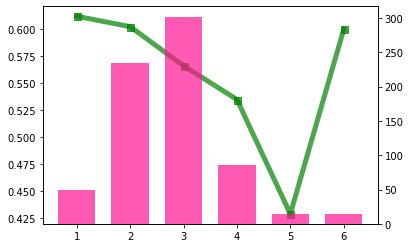

In [ ]:
x = np.arange(1, 7)
count = np.array([ 49., 234., 302.,  86.,  14.,  15.])
score = np.array([30, 141, 171, 46, 6, 9])
answer=score/count

fig, ax1 = plt.subplots()

ax1.plot(x, answer, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='count')
ax2 = ax1.twinx()
ax2.bar(x, count, color='deeppink', label='count', alpha=0.7, width=0.7)

plt.show()

In [ ]:
######################################koelectra SKT_BoolQ 문장 개수 별 시각화

In [4]:
!pip install kss

import csv
import kss

     |████████████████████████████████| 42.4 MB 1.3 MB/s 
     |████████████████████████████████| 170 kB 51.4 MB/s 
  Created wheel for kss: filename=kss-3.3.1.1-py3-none-any.whl size=42449239 sha256=59a072874faac7623a429046d7c895481119f29e79890a617590285567a3c9be
  Stored in directory: /root/.cache/pip/wheels/6e/9d/1d/52871154eff5273abb86b96f4f984c1cd67c5bde64239b060a
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=ac43df22d9959a564e01df95732c30a2504e7ba8b35907c48a77951700a0e070
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built kss emoji


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/국립국어원_Electra/data/BoolQ/SKT_BoolQ_Tfidf_log_Dev_left.tsv', delimiter='\t')


In [3]:
with open('/content/drive/MyDrive/Colab Notebooks/국립국어원_Electra/results tfidf log.tsv', 'r', encoding='utf-8') as f: 
  rdr = csv.reader(f)
  for line in rdr:
    result_list= line

len(result_list)


NameError: ignored

In [ ]:
df['Predict']= result_list
df= df.astype({'Text':'str','Predict':'int'})
df

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",Question NER,Text NER,text count,Predict,score,category
0,1,"구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다. 김봉제는 관약국을 경영하...",봉룡은 숙정을 죽였는가?,0,봉룡,아내 막냇동생 형제 형 김봉룡 간창골 안뒤산 김봉제 통영 구한말,3,0,1,2.0
1,2,빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온다....,세르비아 사람들은 빵을 즐겨 먹는다.,1,빵 세르비아,빵 통밀 빵 호밀 밀 건강식 오븐 근대 600g 세르비아,7,1,1,5.0
2,3,"PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 ...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,PLC,"아일랜드 공화국 연방 PLC 50,000파운드 회사법 영국 미국",4,0,1,3.0
3,4,가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다. 패각의 길이는 ...,가리비는 적을 만나면 껍데기를 닫는다.,0,가리비,붉은색 몸 가리비 노란색 주황색 2~2.5cm 불가사리 보라색,4,0,1,3.0
4,5,"두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라이터...",두아 리파는 영국인인가?,1,리파 영국인,BBC 9위 1995년 8월 22일 ~ 잉글랜드 싱어송라이터 2016 리파 영국,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
695,696,"코어 근육은 신체의 직립,보행,자세유지에 있어서 골격근 및 골격계의 협응으로 기능상...",횡격막근은 코어 근육이 아니다.,0,횡격막근 코어 근육,코어근육 근육 횡경막 몸통 척추 코어 근육 복횡근 1차 횡격막근 허리 횡돌기극근 골...,3,0,1,2.0
696,697,사하위끄(예멘 아랍어: سحاوق)는 예멘의 고추 페이스트이다. 예멘 유대인을 통해...,이스라엘에서는 사하위끄를 먹지 않는다.,0,이스라엘,고추 유대인 아라비아만 دقوس‎ 예멘 이스라엘 히브리어 스후크 사하위끄 아랍어 س...,3,0,1,2.0
697,698,전자 드럼(Electronic Drum)은 현대의 전자 악기로서 주로 음향 드럼 키...,전자 드럼은 드럼 스틱이나 손이 아닌 컴퓨터 프로그램을 이용해 연주한다.,0,손 드럼 스틱 컴퓨터 드럼,Electronic Drum 드럼 하나 이상 손 현대 드럼 스틱 어쿠스틱 드럼 키트,3,0,1,2.0
698,699,피아노는 대표적인 건반악기로서 피아노포르테의 준말이다. 나무로 된 작은 망치가 강철...,피아노는 건반악기인가?,1,피아노,"이탈리아 피아노 피아노포르테 Christofori, B. 독일 피아노줄 바르톨로메오...",2,1,1,1.0


In [ ]:
df['text count']= df.apply(lambda x: len(kss.split_sentences(x['Text'])), axis=1)
df.head()

Process ForkProcess-1419:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: ignored

(array([ 47., 205., 212., 140.,  57.,  23.,  10.,   2.,   1.,   3.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

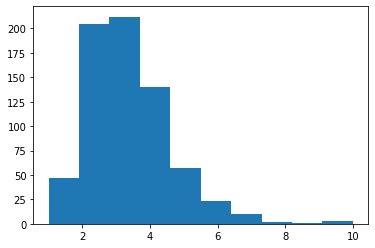

In [ ]:
plt.hist(df['text count'])

In [ ]:
df['score']= df.apply(lambda x: 1 if (x['Answer(FALSE = 0, TRUE = 1)']== x['Predict']) else 0, axis=1)
df.head()

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)",Question NER,Text NER,text count,Predict,score,category
0,1,"구한말, 통영 안뒤산 기슭 간창골에 김봉제 형제가 살았다. 김봉제는 관약국을 경영하...",봉룡은 숙정을 죽였는가?,0,봉룡,아내 막냇동생 형제 형 김봉룡 간창골 안뒤산 김봉제 통영 구한말,3,0,1,2.0
1,2,빵이 세르비아 요리의 가장 기본적인 구성을 이루며 의식적으로 모든 식사 때 나온다....,세르비아 사람들은 빵을 즐겨 먹는다.,1,빵 세르비아,빵 통밀 빵 호밀 밀 건강식 오븐 근대 600g 세르비아,7,1,1,5.0
2,3,"PLC라고도 불리는 공개 유한회사는 영국 회사법, 일부 영연방 관할구역, 아일랜드 ...",PLC에서는 주식을 자유롭게 매각할 수 없는가?,0,PLC,"아일랜드 공화국 연방 PLC 50,000파운드 회사법 영국 미국",4,0,1,3.0
3,4,가리비의 껍데기는 부채처럼 생겼으며 표면에는 골판지처럼 골이 있다. 패각의 길이는 ...,가리비는 적을 만나면 껍데기를 닫는다.,0,가리비,붉은색 몸 가리비 노란색 주황색 2~2.5cm 불가사리 보라색,4,0,1,3.0
4,5,"두아 리파(Dua Lipa, 1995년 8월 22일 ~ )는 잉글랜드의 싱어송라이터...",두아 리파는 영국인인가?,1,리파 영국인,BBC 9위 1995년 8월 22일 ~ 잉글랜드 싱어송라이터 2016 리파 영국,2,1,1,1.0


(array([ 47., 205., 212., 140.,  57.,  39.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

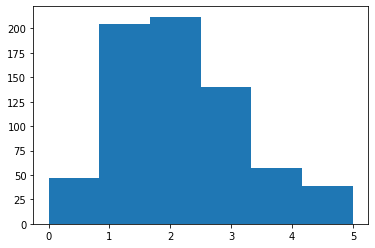

In [ ]:
bin=[ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]

df.loc[df['text count']<=bin[1], 'category']=0
df.loc[(df['text count']<=bin[2])&(df['text count']>bin[1]), 'category']=1
df.loc[(df['text count']<=bin[3])&(df['text count']>bin[2]), 'category']=2
df.loc[(df['text count']<=bin[4])&(df['text count']>bin[3]), 'category']=3
df.loc[(df['text count']<=bin[5])&(df['text count']>bin[4]), 'category']=4
df.loc[(df['text count']<=bin[6])&(df['text count']>bin[5]), 'category']=5
df.loc[(df['text count']<=bin[7])&(df['text count']>bin[6]), 'category']=5
df.loc[(df['text count']<=bin[8])&(df['text count']>bin[7]), 'category']=5
df.loc[(df['text count']<=bin[9])&(df['text count']>bin[8]), 'category']=5
df.loc[df['text count']>bin[9], 'category']=5

plt.hist(df['category'], bins= 6)

In [ ]:
count= [0 for _ in range(len(bin))]

for index in range(len(df['score'])):

  if int(df['score'][index])==1:
    count[int(df['category'][index])]+=1
    
print(count)
print(sum(count))

[39, 169, 172, 116, 45, 30, 0, 0, 0, 0, 0]
571


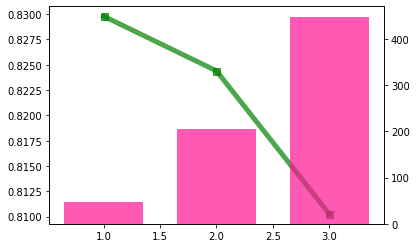

In [ ]:
x = np.arange(1, 4)
count = np.array([ 47., 205., 448.])
score = np.array([39, 169, 363])
answer=score/count

fig, ax1 = plt.subplots()

ax1.plot(x, answer, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='count')
ax2 = ax1.twinx()
ax2.bar(x, count, color='deeppink', label='count', alpha=0.7, width=0.7)

plt.show()